In [1]:
from engin.value import Value
from utils.visualize_value import visualize
import matplotlib.pyplot as plt
%matplotlib inline


a = Value(2.0, expression='a')
b = Value(3.0, expression='b')
c = a + b
d = a * b + b ** a

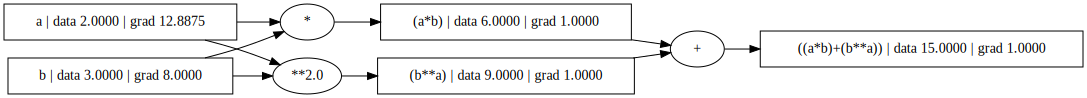

In [2]:
d.backward()
visualize(d)

In [3]:
a = Value(2.0, expression='a')
b = a + a

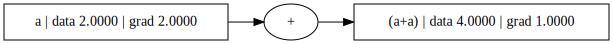

In [4]:
b.backward()
visualize(b)

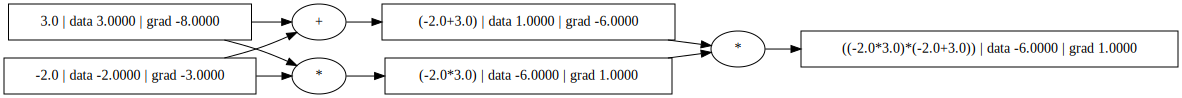

In [5]:
a = Value(-2.0, label='a')
b = Value(3.0, label='b')
d = a * b    ; d.label = 'd'
e = a + b    ; e.label = 'e'
f = d * e    ; f.label = 'f'

f.backward()
visualize(f)